In [1]:
import som
import test_som
import torch
import matplotlib.pyplot as plt

In [2]:
w,h = 5,5

def chart_distances(wrapping,use_test=False):
    fig, axs = plt.subplots(w, h,figsize=(w*2,h*2))
    map = som.SOM((w,h,1),wrapping,gauss=1)
    if use_test:
        map = test_som.IterativeSOM(map,wrapping)
    distances = map.inter_model_distances
    distances = distances.reshape((w*h,w,h))
    min,max = distances.amin(), distances.amax()

    for i in range(len(distances)):
        x = int(i/h)
        y = i%h
        # print(map.map_idx[i])
        axs[x,y].imshow(distances[i,...], interpolation='nearest',vmin=min,vmax=max)
        axs[x,y].set_title(f"{map.map_idx[i].squeeze().numpy()}")
    plt.suptitle(f"{wrapping} use_test={use_test} shape={map.inter_model_distances.shape}")
    plt.tight_layout()
    plt.show()

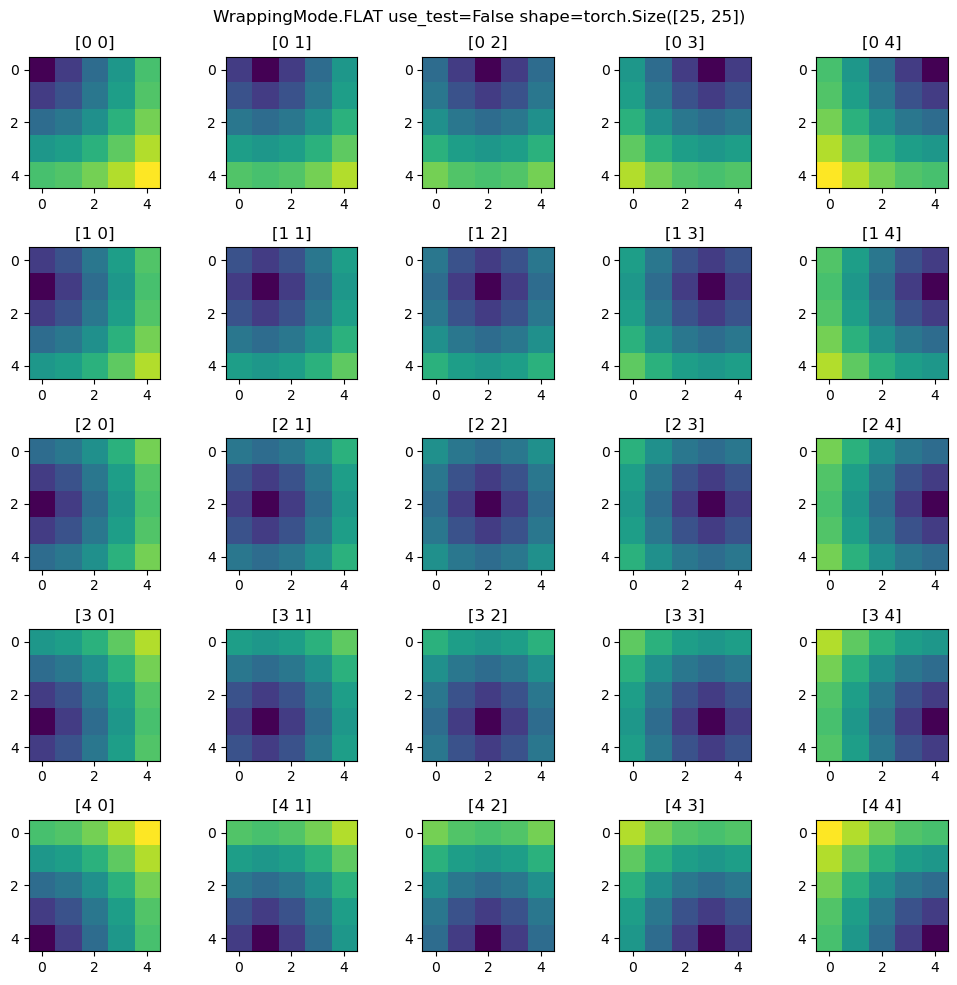

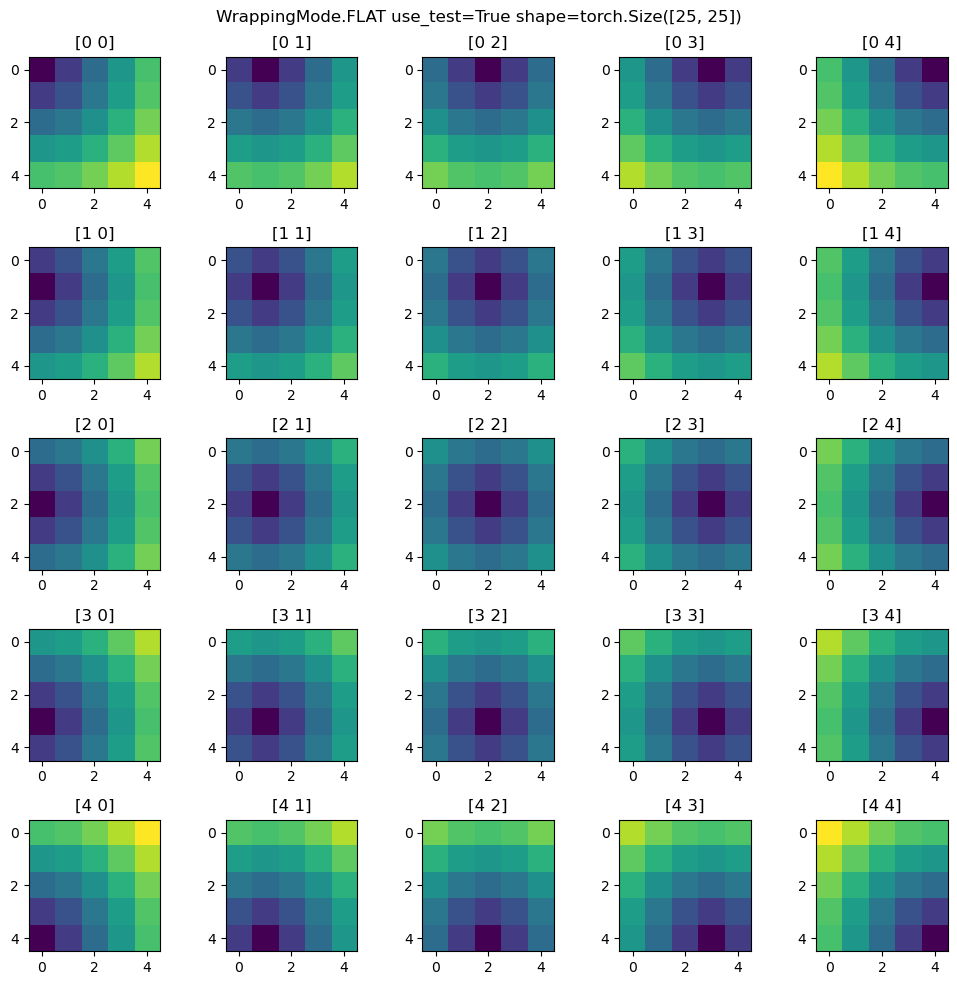

In [3]:
chart_distances(som.WrappingMode.FLAT) 
chart_distances(som.WrappingMode.FLAT,True)

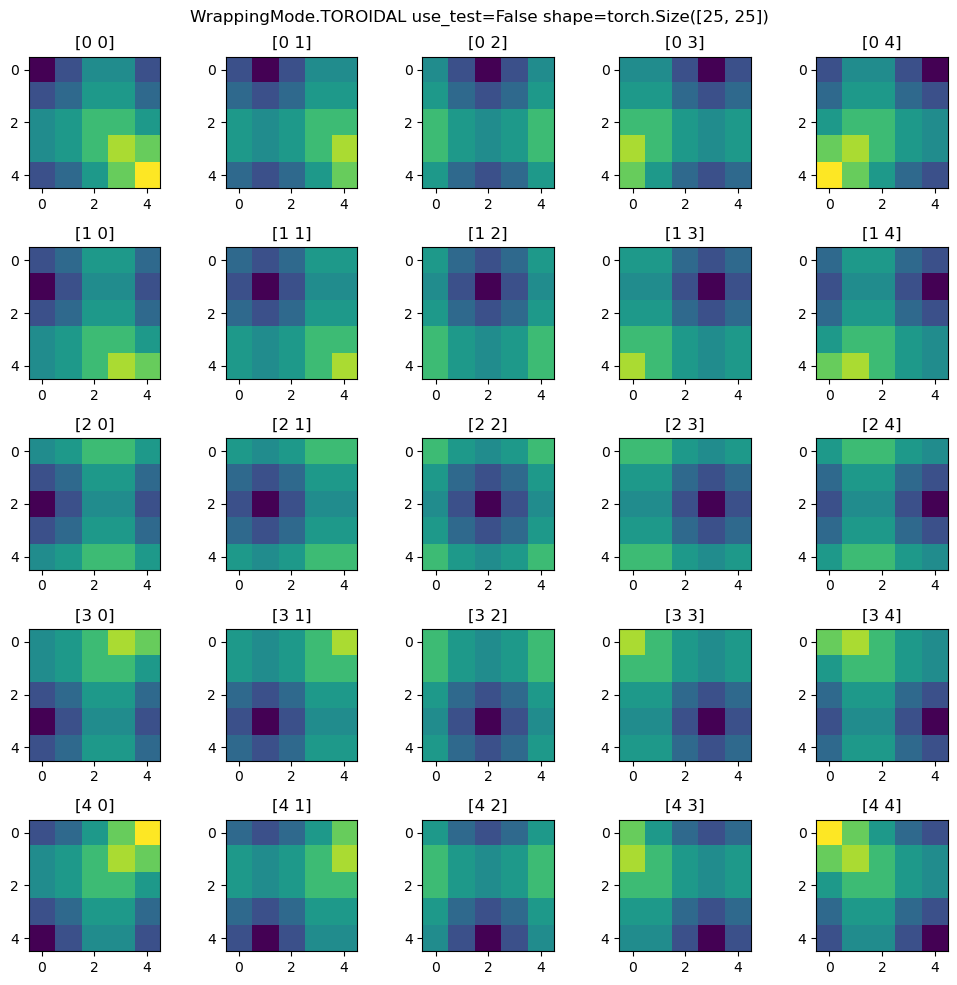

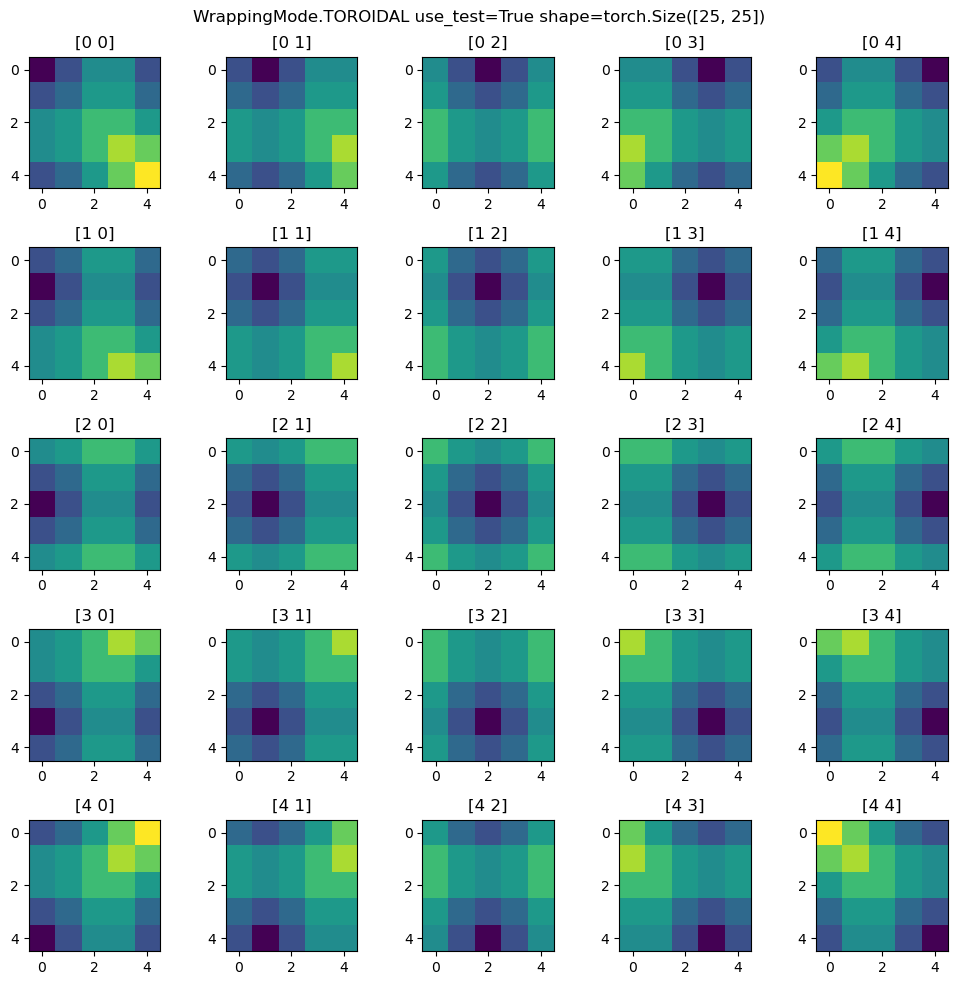

In [4]:
chart_distances(som.WrappingMode.TOROIDAL)
chart_distances(som.WrappingMode.TOROIDAL,True)

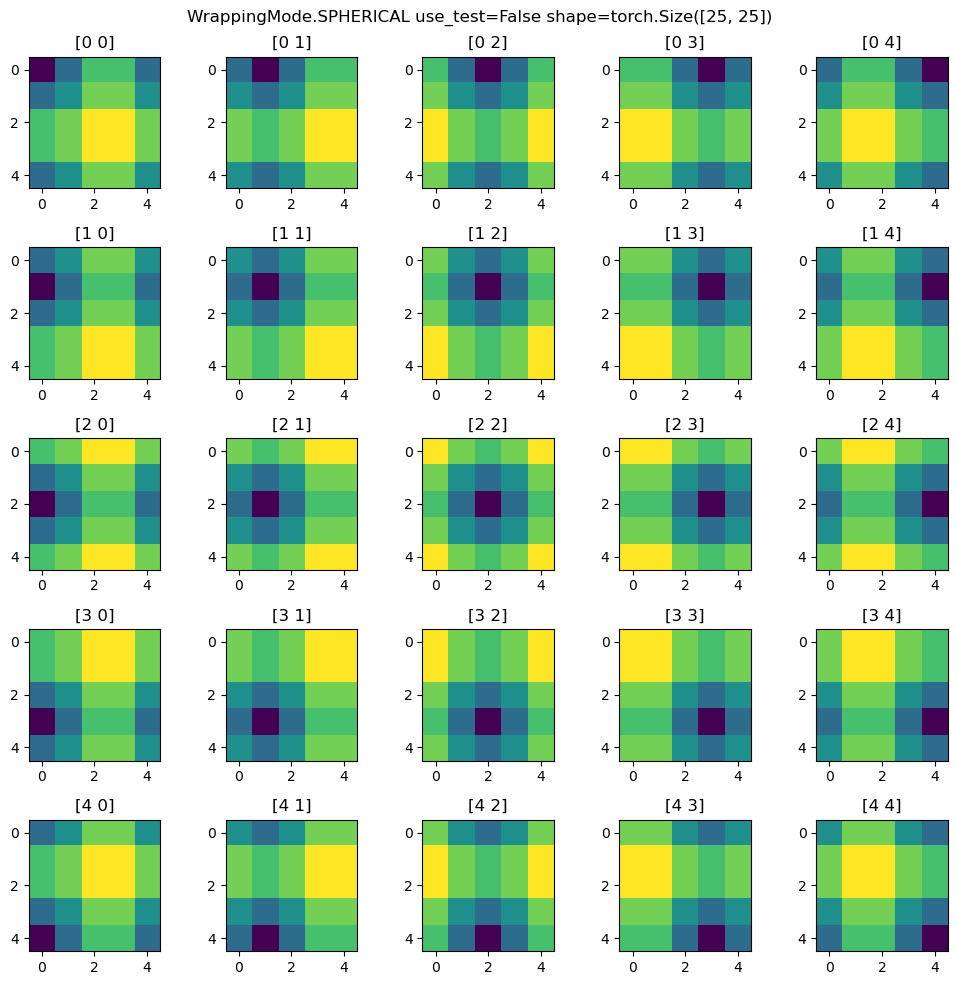

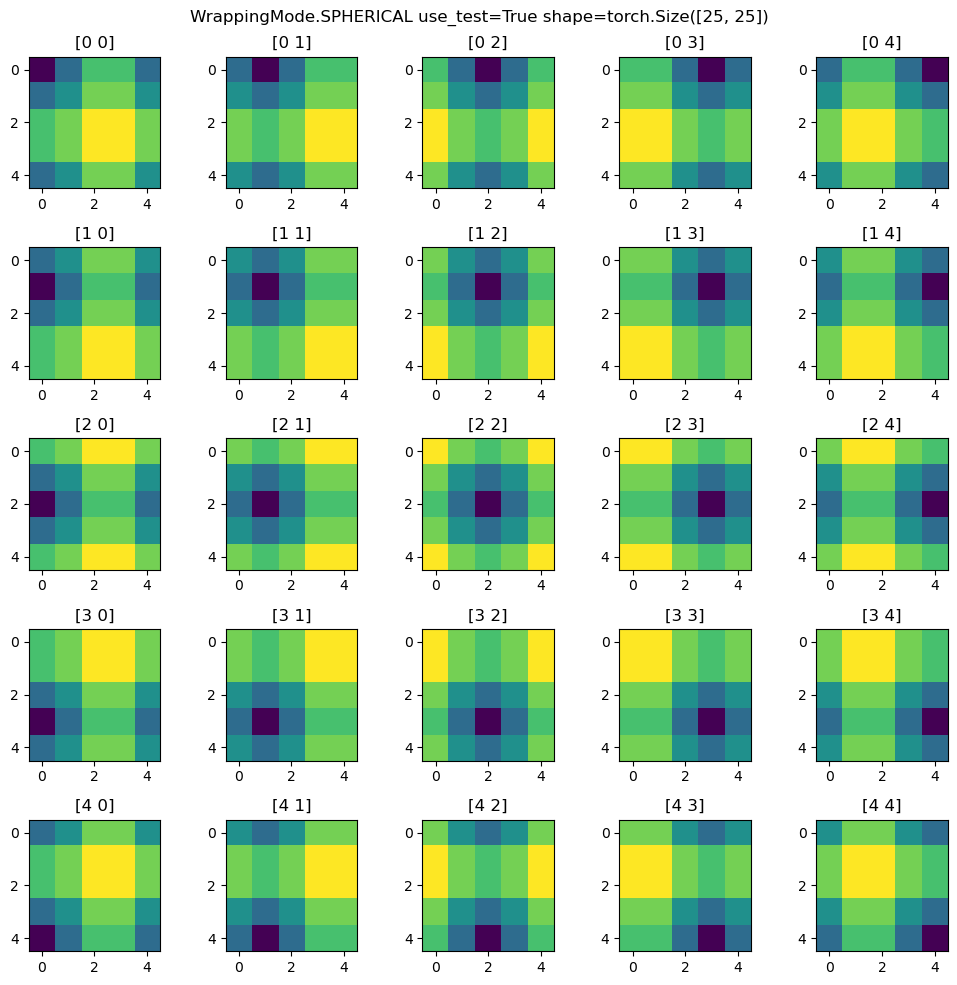

In [5]:
chart_distances(som.WrappingMode.SPHERICAL)
chart_distances(som.WrappingMode.SPHERICAL,True)